<a href="https://colab.research.google.com/github/mamathaguntu/CMPE255/blob/master/Clustering_Assignment/DM_Clustering_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Clustering Techniques##

Dataset used - covid vaccination progress from Kaggle.com

This dataset contains columns such as location , vaccine , and the total number of vaccinations done in that location.

import libraries 

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
import io


Read and display data

In [3]:
vaccine_data = pd.read_csv('/content/sample_data/country_vaccinations_by_manufacturer.csv')
vaccine_data

,location,date,vaccine,total_vaccinations
0,Austria,2021-01-08,Johnson&Johnson,0
1,Austria,2021-01-08,Moderna,0
2,Austria,2021-01-08,Oxford/AstraZeneca,0
3,Austria,2021-01-08,Pfizer/BioNTech,31289
4,Austria,2021-01-15,Johnson&Johnson,0
...,...,...,...,...
22116,European Union,2021-11-23,Oxford/AstraZeneca,67215194
22117,European Union,2021-11-23,Pfizer/BioNTech,440756612
22118,European Union,2021-11-23,Sinopharm/Beijing,2157500
22119,European Union,2021-11-23,Sinovac,9


In [4]:
vaccine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22121 entries, 0 to 22120
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   location            22121 non-null  object
 1   date                22121 non-null  object
 2   vaccine             22121 non-null  object
 3   total_vaccinations  22121 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 691.4+ KB


In [5]:
vaccine_data.shape

(22121, 4)

get the list of vaccinations

In [6]:
vaccine_data['location'].unique()

array(['Austria', 'Belgium', 'Bulgaria', 'Chile', 'Croatia', 'Cyprus',
       'Czechia', 'Denmark', 'Ecuador', 'Estonia', 'Finland', 'France',
       'Germany', 'Hong Kong', 'Hungary', 'Iceland', 'Ireland', 'Italy',
       'Japan', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg',
       'Malta', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania',
       'Slovakia', 'Slovenia', 'South Korea', 'Spain', 'Sweden',
       'Switzerland', 'Ukraine', 'United States', 'Uruguay',
       'European Union'], dtype=object)

Remove countries with zero vaccination record

In [7]:
final_data = vaccine_data[(vaccine_data['total_vaccinations']!=0)]

In [8]:
final_data.head()

,location,date,vaccine,total_vaccinations
3,Austria,2021-01-08,Pfizer/BioNTech,31289
5,Austria,2021-01-15,Moderna,89
7,Austria,2021-01-15,Pfizer/BioNTech,116306
9,Austria,2021-01-22,Moderna,312
11,Austria,2021-01-22,Pfizer/BioNTech,213655


In [9]:
final_data.shape

(21691, 4)

Get the list of locations

In [10]:
final_data['location'].unique()

array(['Austria', 'Belgium', 'Bulgaria', 'Chile', 'Croatia', 'Cyprus',
       'Czechia', 'Denmark', 'Ecuador', 'Estonia', 'Finland', 'France',
       'Germany', 'Hong Kong', 'Hungary', 'Iceland', 'Ireland', 'Italy',
       'Japan', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg',
       'Malta', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania',
       'Slovakia', 'Slovenia', 'South Korea', 'Spain', 'Sweden',
       'Switzerland', 'Ukraine', 'United States', 'Uruguay',
       'European Union'], dtype=object)

Map each vaccine with the a value 

In [13]:
# map the location to value 
mapped_data = final_data.copy()
mapped_data['location'] = final_data['location'].map({'Austria':0, 'Belgium':1, 'Bulgaria':2, 'Chile':3, 'Croatia':4, 'Cyprus':5,
       'Czechia':6, 'Denmark':7, 'Ecuador':8, 'Estonia':9, 'Finland':10, 'France':11,
       'Germany':12, 'Hong Kong':13, 'Hungary':14, 'Iceland':15, 'Ireland':16, 'Italy':17,
       'Japan':18, 'Latvia':19, 'Liechtenstein':20, 'Lithuania':21, 'Luxembourg':22,
       'Malta':23, 'Netherlands':24, 'Norway':25, 'Poland':26, 'Portugal':27, 'Romania':28,
       'Slovakia':29, 'Slovenia':30, 'South Korea':31, 'Spain':32, 'Sweden':33,
       'Switzerland':34, 'Ukraine':35, 'United States':36, 'Uruguay':37,
       'European Union':38})

mapped_data = mapped_data[['location', 'total_vaccinations']]
mapped_data

,location,total_vaccinations
3,0,31289
5,0,89
7,0,116306
9,0,312
11,0,213655
...,...,...
22116,38,67215194
22117,38,440756612
22118,38,2157500
22119,38,9


Group by location and get total vaccinations for each location

In [14]:
sample_data = mapped_data.groupby('location').sum()
sample_data

,total_vaccinations
location,
0,292780677
1,399525319
2,66695786
3,5823445318
4,91547287
5,29133622
6,2093379650
7,195066571
8,2674634073


Reset the index to get the data in proper tabular format 

In [15]:
sample_data.reset_index(level=0, drop =2)
sample_data = sample_data.reset_index()

In [20]:
sample_data

,location,total_vaccinations
0,0,292780677
1,1,399525319
2,2,66695786
3,3,5823445318
4,4,91547287
5,5,29133622
6,6,2093379650
7,7,195066571
8,8,2674634073
9,9,35782174


Normalize the total vaccinations value between 0 and 1 

In [22]:
def scale_total_vaccinations(min_scale_num,max_scale_num,var):
    return (max_scale_num - min_scale_num) * ( (var - min(var)) / (max(var) - min(var)) ) + min_scale_num


In [23]:
sample_data['total_vaccinations'] = scale_total_vaccinations(0,1,sample_data['total_vaccinations'].astype(float)) # scaled between 0,1

In [24]:
sample_data

,location,total_vaccinations
0,0,0.003058
1,1,0.004177
2,2,0.000688
3,3,0.061040
4,4,0.000948
5,5,0.000294
6,6,0.021935
7,7,0.002034
8,8,0.028029
9,9,0.000364


###K-Means Clustering###

Identify number of clusters with the elbow method

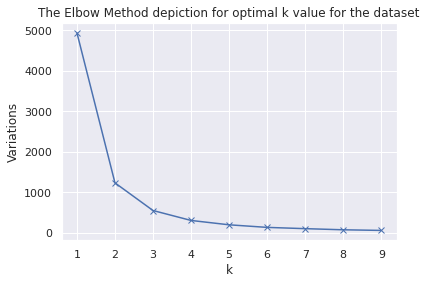

In [25]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
variations = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(sample_data)
    variations.append(kmeanModel.inertia_)

# Plot the Elbow
plt.plot(K, variations, 'bx-')
plt.xlabel('k')
plt.ylabel('Variations')
plt.title('The Elbow Method depiction for optimal k value for the dataset')
plt.show()


Plot before clustering

In [26]:
from sklearn.cluster import KMeans

kmeans = KMeans(4)

In [27]:
kmeans.fit(sample_data)

KMeans(n_clusters=4)

In [28]:
clusters = kmeans.fit_predict(sample_data)
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

In [29]:
Clustered_data = sample_data.copy()
Clustered_data['cluster'] = clusters
Clustered_data

,location,total_vaccinations,cluster
0,0,0.003058,0
1,1,0.004177,0
2,2,0.000688,0
3,3,0.061040,0
4,4,0.000948,0
5,5,0.000294,0
6,6,0.021935,0
7,7,0.002034,0
8,8,0.028029,0
9,9,0.000364,0


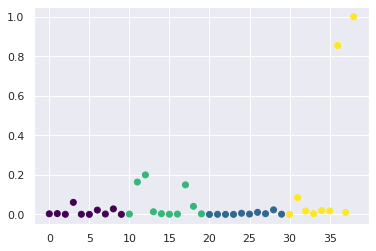

In [30]:
plt.scatter(Clustered_data['location'], Clustered_data['total_vaccinations'], c= Clustered_data['cluster'], cmap='viridis')

plt.show()

###Hierarchical clustering###

In [31]:
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

In [32]:
sample_data2 = sample_data.copy()
sample_data2

,location,total_vaccinations
0,0,0.003058
1,1,0.004177
2,2,0.000688
3,3,0.061040
4,4,0.000948
5,5,0.000294
6,6,0.021935
7,7,0.002034
8,8,0.028029
9,9,0.000364


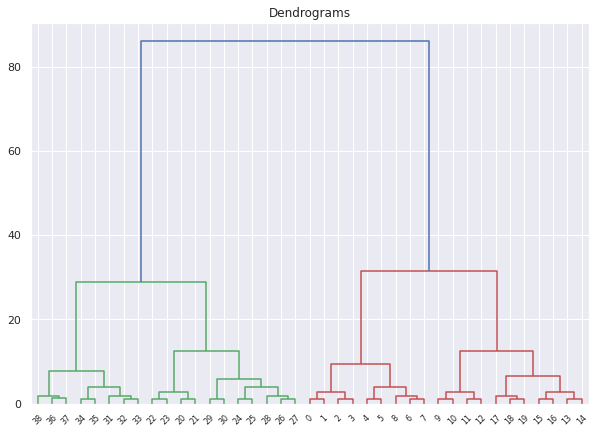

In [35]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(sample_data2, method='ward'))

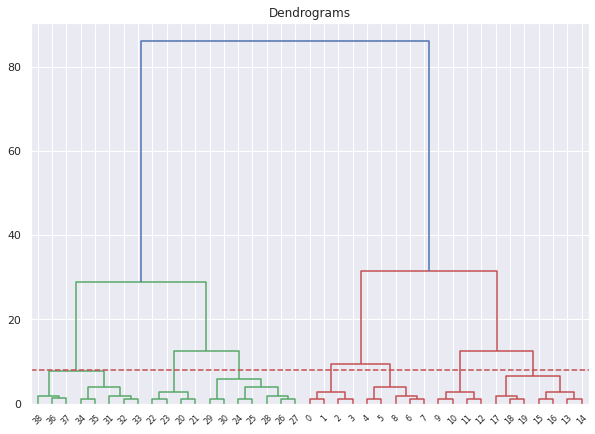

In [36]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(sample_data2, method='ward'))
plt.axhline(y=8, color='r', linestyle='--')

Number of clusters = 4

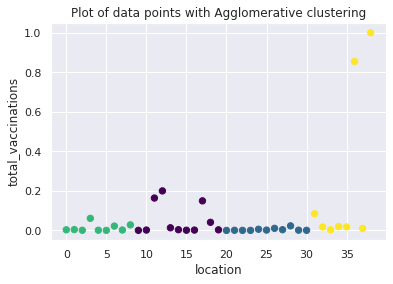

In [37]:
from sklearn.cluster import AgglomerativeClustering
hierarchical_model = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'ward')
clust_labels = hierarchical_model.fit_predict(sample_data2)
plt.scatter(sample_data2['location'], sample_data2['total_vaccinations'], c=clust_labels, s=40, cmap='viridis');
plt.xlabel('location')
plt.ylabel('total_vaccinations')
plt.title('Plot of data points with Agglomerative clustering')
plt.show()

###Gaussian mixture models clustering###

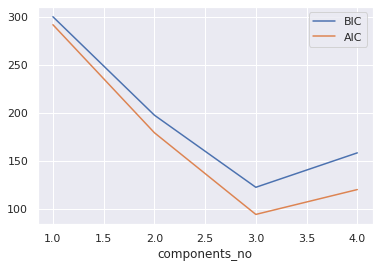

In [49]:
from sklearn.mixture import GaussianMixture

gmm_sample_data = sample_data

components_no = np.arange(1, 5)
gmm = [GaussianMixture(n, covariance_type='full', random_state=0).fit(gmm_sample_data)
for n in components_no]
plt.plot(components_no, [m.bic(gmm_sample_data) for m in gmm], label='BIC')
plt.plot(components_no, [m.aic(gmm_sample_data) for m in gmm], label='AIC')
plt.legend(loc='best')

plt.xlabel('components_no');

In [50]:
gmm = GaussianMixture(n_components=3).fit(gmm_sample_data)
labels = gmm.predict(gmm_sample_data)


In [51]:
labels

array([1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2])

In [52]:
probs = gmm.predict_proba(gmm_sample_data)
print(probs[:5].round(3))

[[0.032 0.968 0.   ]
 [0.041 0.959 0.   ]
 [0.034 0.966 0.   ]
 [1.    0.    0.   ]
 [0.04  0.96  0.   ]]


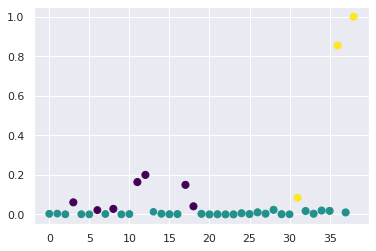

In [53]:
size = 50*probs.max(1)**2
plt.scatter(gmm_sample_data['location'], gmm_sample_data['total_vaccinations'], c=labels, s=size, cmap='viridis');

###DB Scan clustering###

In [46]:
!pip install pycaret

     |████████████████████████████████| 288 kB 17.7 MB/s 
     |████████████████████████████████| 2.0 MB 46.6 MB/s 
     |████████████████████████████████| 113 kB 41.6 MB/s 
     |████████████████████████████████| 1.7 MB 55.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 261 kB 68.3 MB/s 
     |████████████████████████████████| 16.9 MB 64.0 MB/s 
     |████████████████████████████████| 1.3 MB 58.3 MB/s 
     |████████████████████████████████| 167 kB 63.9 MB/s 
     |████████████████████████████████| 6.8 MB 54.1 MB/s 
     |████████████████████████████████| 86 kB 5.8 MB/s 
     |████████████████████████████████| 56 kB 4.7 MB/s 
     |████████████████████████████████| 596 kB 55.6 MB/s 
     |████████████████████████████████| 303 kB 58.8 MB/s 
     |████████████████████████████████| 3.1 MB 35.4 MB/s 
     |████████████████

In [47]:
# from pycaret.clustering import *
from pycaret.datasets import get_data
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [54]:
sample_data3 = sample_data
df_dbscan = sample_data3.copy()
df_dbscan.head()


,location,total_vaccinations
0,0,0.003058
1,1,0.004177
2,2,0.000688
3,3,0.061040
4,4,0.000948


In [55]:
df_dbscan.shape

(39, 2)

In [56]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [57]:
scaled_data = scaler.fit_transform(df_dbscan)
scaled_data.shape

(39, 2)

In [58]:
from sklearn.cluster import DBSCAN

model=DBSCAN(eps=0.04,min_samples=10).fit(scaled_data)
print(model.labels_)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


In [60]:
sample_data3

,location,total_vaccinations
0,0,0.003058
1,1,0.004177
2,2,0.000688
3,3,0.061040
4,4,0.000948
5,5,0.000294
6,6,0.021935
7,7,0.002034
8,8,0.028029
9,9,0.000364


In [64]:
sample_data3['db_cluster_label'] = model.labels_
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink']
vectorizer = np.vectorize(lambda : colors[x % len(colors)])

Text(0, 0.5, 'vaccine')

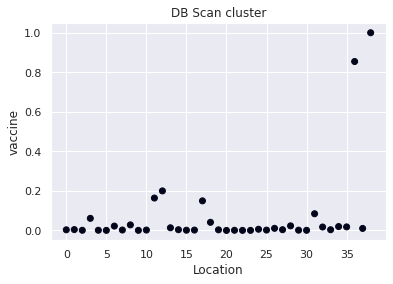

In [65]:
plt.scatter(df_dbscan['location'], df_dbscan['total_vaccinations'], c=sample_data3['db_cluster_label']);
plt.title('DB Scan cluster')
plt.xlabel('Location')
plt.ylabel('vaccine')